**Link to the challenge can be found [here](https://data-puzzles.com/challenges/spring-cleaning/).**

**Link to Google collab can be found [here](https://colab.research.google.com/drive/1bJ2KBcTq68Rd2t6yBb8nXGK5RKG6nQpV).**

# Intro

It's Spring Cleaning time!

I have a few audios in my dataset that sound *almost* the same, could you find them for me?

# Kickstart

In [5]:
# get the dataset
# !git clone https://github.com/hyperc54/data-puzzles-assets.git

# note: i am modifying the code above to make sure it doesnt run if the assets are already in the working directory
import os

if not os.path.exists("data-puzzles-assets"):
    os.system("git clone https://github.com/hyperc54/data-puzzles-assets.git")
else:
    print("Folder already exists. Skipping clone.")


Folder already exists. Skipping clone.


In [6]:
dataset_path = './data-puzzles-assets/audio/to_clean'

In [7]:
import os
import IPython.display as ipd

import soundfile as sf
import librosa

all_audios = []

# load dataset in memory
for filename in os.listdir(dataset_path):
  data, samplerate = sf.read(os.path.join(dataset_path,filename))

  all_audios.append({
      'name': filename,
      'samples': data,
      'samplerate': samplerate
  })


In [56]:
# Check one of the audios
ipd.Audio(
    all_audios[0]['samples'],
    rate=all_audios[0]['samplerate']
)

# Attempt

In [10]:
all_audios[0:5]

[{'name': 'eng-0026355f.wav',
  'samples': array([-0.00164795, -0.00161743, -0.00152588, ...,  0.00091553,
          0.00131226, -0.00354004]),
  'samplerate': 44100},
 {'name': 'eng-003a4645.wav',
  'samples': array([-0.00445557, -0.00500488, -0.00445557, ..., -0.0055542 ,
         -0.00546265, -0.00527954]),
  'samplerate': 44100},
 {'name': 'eng-0061ee1b.wav',
  'samples': array([-0.00033569, -0.00039673, -0.00067139, ...,  0.08779907,
          0.11071777,  0.13195801]),
  'samplerate': 44100},
 {'name': 'eng-00f82ed9.wav',
  'samples': array([ 0.0010376 , -0.01907349,  0.00878906, ...,  0.00067139,
          0.00650024,  0.00494385]),
  'samplerate': 44100},
 {'name': 'eng-0127efe1.wav',
  'samples': array([ 0.0012207 ,  0.00161743,  0.00180054, ..., -0.00180054,
         -0.00192261, -0.00180054]),
  'samplerate': 44100}]

In [11]:
len(all_audios)

989

In [12]:
names = [audio['name'] for audio in all_audios]

In [13]:
samples = [audio['samples'] for audio in all_audios]

Find if any names or samples are the same.

In [15]:
import collections
[item for item, count in collections.Counter(names).items() if count > 1]

[]

In [16]:
sample_tuples = [tuple(sample_array) for sample_array in samples]

In [17]:
[list(item) for item, count in collections.Counter(sample_tuples).items() if count > 1]

[]

Stack arrays and then find L2 norm pairwise-distances to see how far they are.

In [19]:
import numpy as np
distances = np.empty([len(all_audios), len(all_audios)])

In [20]:
for i in range(len(all_audios)):
    for j in range(len(all_audios)):
        distances[i, j] = np.linalg.norm(all_audios[i]['samples'] - all_audios[j]['samples'])

# much quicker alternative using scikit learn
# all_audios_samples = np.vstack([audio['samples'] for audio in all_audios])
# from sklearn.metrics import pairwise_distances
# distances = pairwise_distances(all_audios_samples, metric = 'l2')

If we were to find the minimum distances, the function would return the diagonals (since diagonals contain the arrays subtracted by themselves, thus making them 0). To solve this issue, let's add a large arbitrary number so finding the minimum does not affect that result.

In [22]:
distances = distances + (np.eye(distances.shape[0]) * 1000000)

Now, we can find the minimum distances of each sample relative to another.

In [24]:
min_distances = np.min(distances, axis = 0)

In [25]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distances of Each Sample')

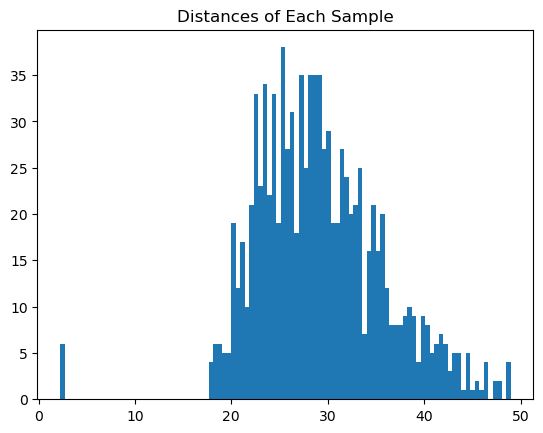

In [26]:
plt.hist(min_distances, bins = 100)
plt.title('Distances of Each Sample')

Note the distances that are far from the rest of the distribution. Those are the samples that are similar.

In [28]:
similar_audios = np.where(min_distances<5)

In [29]:
# unlist list for iterability
similar_audios = similar_audios[0]

In [54]:
for audio in similar_audios:
    ipd.display(
        ipd.Audio(
          all_audios[audio]['samples'],
          rate = all_audios[audio]['samplerate']
        )
      )